# Plotting with Python

This notebook is written in parallel to an article for my website. We will 
introduce the basics of creating plots in Python using Matplotlib .

## Initial Setup

We'll begin with the the line `%matplotlib inline`. This is specific to notebooks
and tells the notebook to render matplotlib plots inline. We then import
the libraries we'll use throughout our examples. In this case, `numpy` and `matplotlib.pyplot`.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## A Simple Plot
 
We begin with a simple sine plot using `np.sin`. First we use `np.linspace` to 
create a list of all our X points. In this case, an evenly spaced list from $0$ 
to $4\pi$ with 100 points. We then generate our Y points by calling `np.sin` on
the X list. Finally, we can use `plt.plot(x, y)` to plot the results.


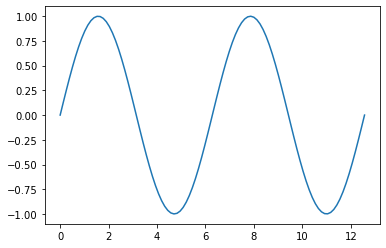

In [2]:
x = np.linspace(0, 4*np.pi, 100)
y = np.sin(x)

plt.plot(x, y)
plt.show()

## Multiple Lines

Now we'll plot multiple lines on a s single chart. In this case, 
- $y_1 = 0.5 \sin{(x)}$
- $y_2 = 0.5 \cos{(x)}$
- $y_3 = 2 \sin{(x)}$ 
- $y_4 = 2 \cos{(x)}$. 

We have the option of calling `plt.plot` once as `plt.plot(x, y1, x, y2, x, y3, x, y4)` or once for each plot (shown below). Note, we'll also specify the format
of the lines.

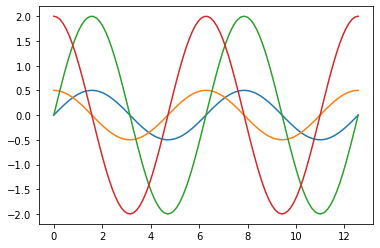

In [3]:
x = np.linspace(0, 4*np.pi, 100)
y1 = 0.5*np.sin(x)
y2 = 0.5*np.cos(x)
y3 = 2*np.sin(x)
y4 = 2*np.cos(x)

plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.plot(x, y4)
plt.show()

## Line Styles
We can pass additional arguments to `plot()` to specify the line style. The first way is specify a *format string*. That might look something like `'-b'` or `'--sy'`. We can specify the line style, marker style, and color with this format string. For example `-` tells matplotlib to make the line solid, `--` is dashed, and `:` is dotted. We can also define the marker style. In our `'--sy'` example, `s` declares that the marker should be square. The full list of marker codes can be found [here](https://matplotlib.org/stable/api/markers_api.html). Finally, we can specify the color. The following color codes are available:

- `b` is blue
- `r` is red
- `g` is green
- `c` is cyan
- `m` is magenta
- `y` is yellow
- `k` is black

If we want to customize our plot styles further, we can use a variety of keyword arguments such as `markersize` and `linewidth` to modify the plot style. The full list of options is available [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html).

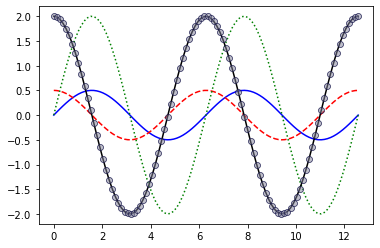

In [4]:
# Solid, blue line
plt.plot(x, y1, '-b')

# Red, dashed line
plt.plot(x, y2, '--r')

# Dotted, green line
plt.plot(x, y3, ':g', linewidth=1.5)

# We call also use keyword arguments
plt.plot(
    x, y4, '-ok', 
    markersize=6, 
    markeredgewidth=0.75, 
    markeredgecolor=[0.1, 0.1, 0.3, 0.9], 
    markerfacecolor=[0.5, 0.5, 0.6, 0.5]
) 
plt.show()

## Using Stylesheets

If we want to change a lot more about our plot with a lot less code, we can use stylesheets. Matplotlib comes with several predefined stylesheets. We can use `plt.style.available` to see the list of available style sheets.

In [5]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In this case, we'll combine a few style sheets that set the plot size, grid colors, and line colors to create a graph with a clean style without having to specify the style of each line.

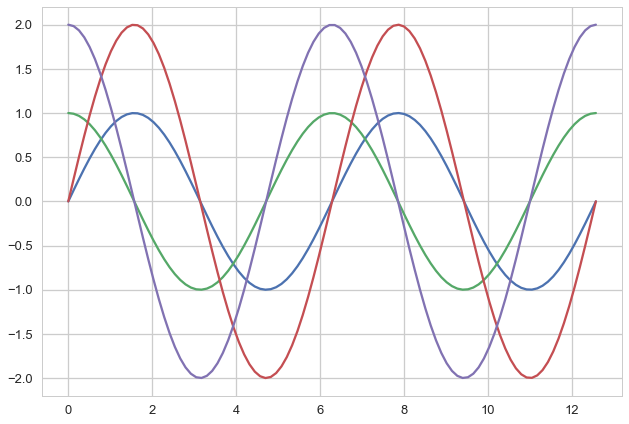

In [6]:
plt.style.use('seaborn-talk')
plt.style.use('seaborn-whitegrid')
plt.style.use('seaborn-deep')

x = np.linspace(0, 4*np.pi, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = 2*np.sin(x)
y4 = 2*np.cos(x)

plt.plot(x, y1, x, y2, x, y3, x, y4)
plt.show()

We can also create our own style sheet. The one for this example can be found at [./mystyle.mplstyle](./mystyle.mplstyle). This stylesheet defines the plto size, custom colors, and a bit more.

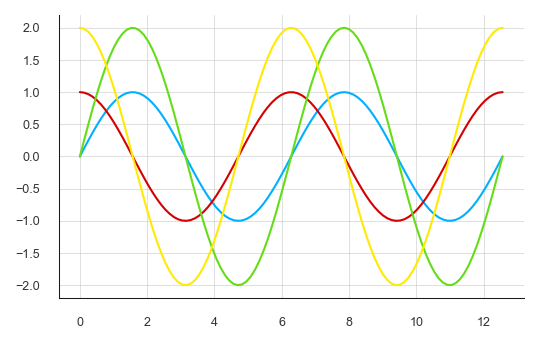

In [7]:
plt.style.use('mystyle.mplstyle')
plt.plot(x, y1, x, y2, x, y3, x, y4)
plt.show()

## Scatter Plots
Now we can use `plt.scatter` to plot some noisy data. According to [Jake VanderPlas](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.02-Simple-Scatter-Plots.ipynb), `plt.plot` is much more efficient than `plt.scatter` for larger data sets.

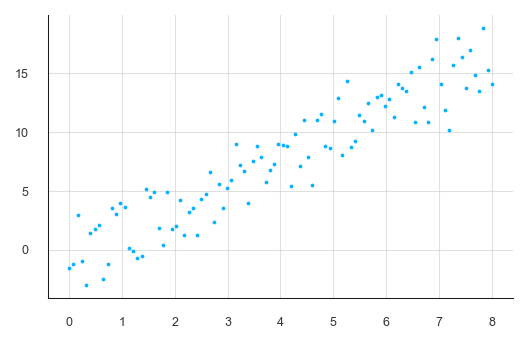

In [8]:
x = np.linspace(0, 8, 100)
y = 2*x

# Add noise
noisy = [point + 5*np.random.random() - 5*np.random.random() for point in y]

plt.scatter(x, noisy, marker='o', s=2)
plt.show()

## Best Fit Line
Now we can use NumPy's [polyfit](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) to generate a polynomial fit line. We'll also add some text to the plot to show the equation of the line and the R-squared value.

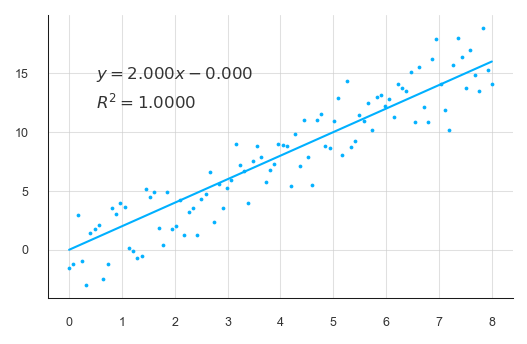

In [9]:
# Fit line
degree = 1
fit = np.polyfit(x, y, degree)
bfline = fit[0]*x + fit[1]

# R-squared
correlation_matrix = np.corrcoef(x, y)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

# R-squared
p = np.poly1d(fit)
yhat = p(x)
ybar = np.sum(y)/len(y)
ssreg = np.sum((yhat-ybar)**2)
sstot = np.sum((y - ybar)**2)
r_squared = ssreg / sstot

# Plot data points and line fit
plt.scatter(x, noisy, marker='o', s=2)
plt.plot(x, bfline)

# Generate labels and show plot
m = f'{fit[0]:.3f}'
b = f'{fit[1]:.3f}'
op = '' if b.startswith('-') else '+'
eq_label = f'$y = {m}x {op} {b}$'
r_label = f'$R^2 = {r_squared:.4f}$'
plt.text(0.5, 14.5, eq_label, fontsize=8)
plt.text(0.5, 12, r_label, fontsize=8)
plt.show()

## Subplots
We can also generate plot multiple graphs in a single figure using subplots. The simplest way to do this is call `plt.subplot()`. Subplot takes three arguments: the number of rows, the number of columns, and the position of the next plot.

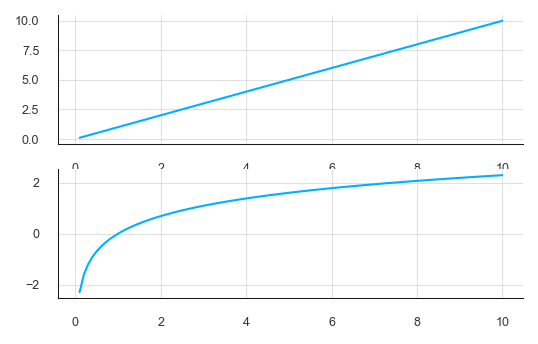

In [10]:
x = np.linspace(0.1, 10, 100)

plt.subplot(2,1,1)
plt.plot(x, x)

plt.subplot(2,1,2)
plt.plot(x, np.log(x))

plt.show()

### FFT Example
Let's look at another example using a Fast-Fourier Transform (FFT). This example is base on [this page from UC Berkeley](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter24.04-FFT-in-Python.html). First we need to generate an aggregate signal. In this case, our signal consists of three sine waves of frequencies 1, 4, and 7 Hz each with varying amplitude.

In [11]:
# Complex signal
sr = 2000 # sampling rate
ts = 1.0/sr # sampling interval
t = np.arange(0,2,ts)

freq = 1
A = 3
x = A*np.sin(2*np.pi*freq*t)

freq = 3.5
A = 1.5
x += A*np.sin(2*np.pi*freq*t)

freq = 6 
A = 0.5
x += A* np.sin(2*np.pi*freq*t)

freq = 9.5
A = 1.5
x += A* np.sin(2*np.pi*freq*t)

freq = 0.5
A = 1
x += A* np.sin(2*np.pi*freq*t)

Then, we can compute the fast-fourier transform (FFT) of the plot using NumPy's `fft` module.

In [12]:
X = np.fft.fft(x)
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 
F = np.abs(X)
print(F)

[3.12747923e-14 2.00000000e+03 6.00000000e+03 ... 2.35140134e-13
 6.00000000e+03 2.00000000e+03]


Then we will create a figure with subplots (2 rows and 1 column) and plot the time series signal on the top set of axes and the frequency domain on the bottom.

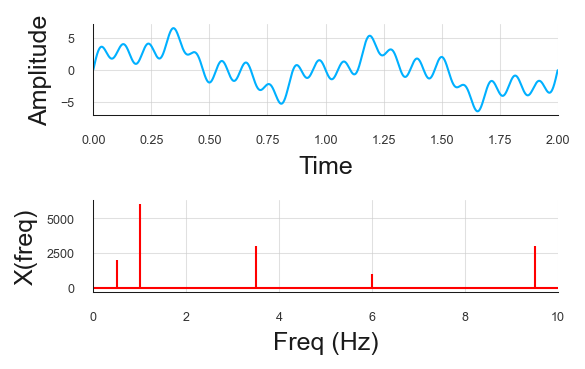

In [13]:
fig, axs = plt.subplots(2, 1)

axs[0].plot(t, x)
axs[0].set_xlim(0, 2)
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Amplitude')
axs[0].grid(True)

axs[1].stem(freq, F, 'r', markerfmt=" ", basefmt="-r")
axs[1].set_xlim(0, 10)
axs[1].set_xlabel('Freq (Hz)')
axs[1].set_ylabel('X(freq)')
axs[1].grid(True)

plt.tight_layout()
plt.show()


## Formatting 
With some basics of plotting covered, its worth introducing some formatting basics to make your plots a bit more professional and detailed.

### Titles and Axes Labels
Matplotlib provides `.title()`, `.xlabel()`, and `.ylabel()` functions to add plot titles and axes labels.

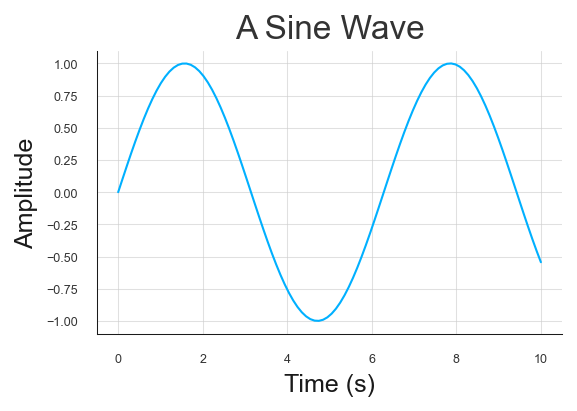

In [14]:
x = np.linspace(0, 10, 100)
y = np.sin(x)

plt.plot(x, y)
plt.title('A Sine Wave')
plt.ylabel('Amplitude')
plt.xlabel('Time (s)')
plt.show()

### Legends
The `.legend()` function allows you to add a legend to the plot.

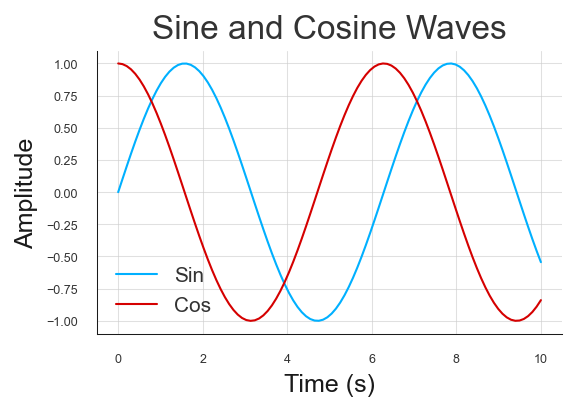

In [15]:
#plt.style.use('classic')
#plt.style.use('seaborn')
#plt.style.use('seaborn-paper')

x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

plt.plot(x, y1, x, y2)
plt.title('Sine and Cosine Waves')
plt.ylabel('Amplitude')
plt.xlabel('Time (s)')
plt.legend(['Sin', 'Cos'], fontsize=10)
plt.show()

## Saving Figures
We can use `plt.savefig()` to save the current figure. In the example below, we style and generate a plot, then call `plt.gcf()` to **g**et the **c**urrent **f**igure, then adjust its size, and use `savefig()` to save the figure as a JPEG image.

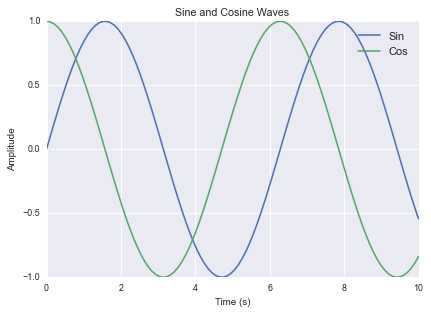

In [16]:
plt.style.use('classic')
plt.style.use('seaborn')
plt.style.use('seaborn-paper')

x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

plt.plot(x, y1, x, y2)
plt.title('Sine and Cosine Waves')
plt.ylabel('Amplitude')
plt.xlabel('Time (s)')
plt.legend(['Sin', 'Cos'], fontsize=10)


# Ge the current figure and update its size
fig = plt.gcf()
fig.set_size_inches(6, 4)

# Save the figure
plt.savefig('output.jpg', dpi=300)
plt.show()

## Additional Resources

This barely scratches the surface of what can be done with Matplotlib. For more examples, check out the [matplotlib example gallery](https://matplotlib.org/stable/gallery/index.html).